In [128]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

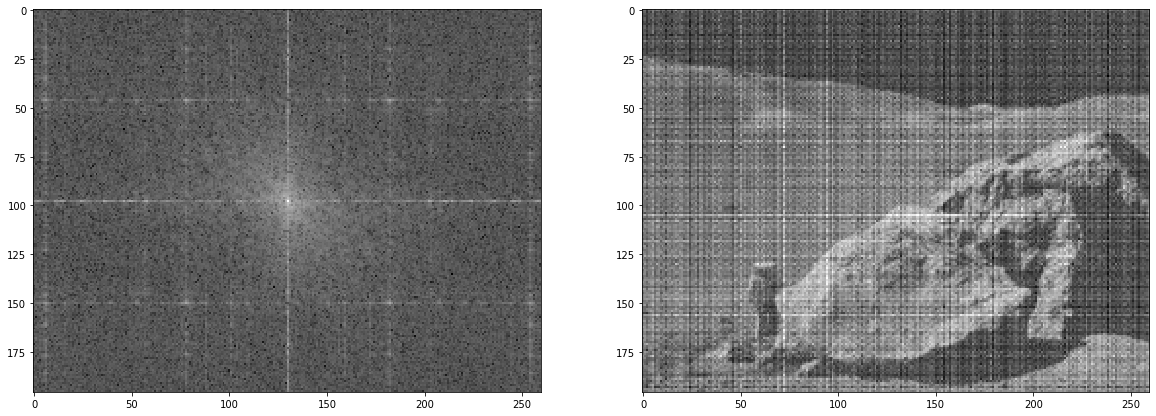

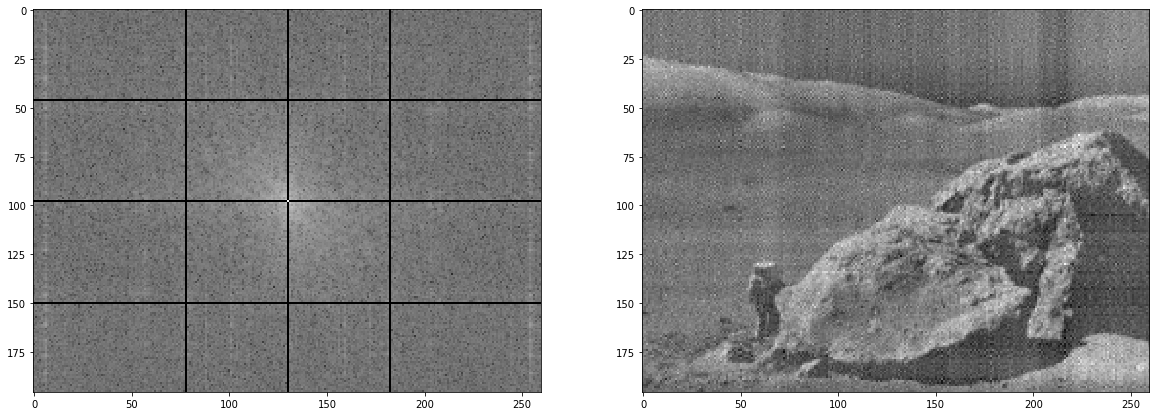

In [131]:
img = cv2.cvtColor(cv2.imread('DIP_2019_A3/land.png'),cv2.COLOR_BGR2GRAY)
ff = np.fft.fft2(img)
ff_shift = np.fft.fftshift(ff)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(np.log(1+abs(ff_shift)),'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')
plt.show()
m = np.array([[98,130],[46,78],[150,182]])
a = np.zeros(3,dtype=np.complex)
for i in range(3):
    a[i] = ff_shift[m[i,0],m[i,1]]
    ff_shift[m[i,0],:] = 0
    ff_shift[:,m[i,1]] = 0
#     ff_shift[m] = a
#     print(m[i])
for i in range(3):
    ff_shift[m[0,0],m[0,1]] = a[0]

de_img = np.fft.ifft2(np.fft.ifftshift(ff_shift))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(np.log(1+abs(ff_shift)),'gray')
plt.subplot(1,2,2)
plt.imshow(abs(de_img),'gray')
plt.show()

From the log plot of shifted fourier transform, we can see that the noise is of particular frequencies. The middle one is the image frequency(DC component with frequency 0). But the points on the same line have non-zero component. So I reduced those points to 0. as log(1+abs(shifted_fft[i, j])) = 0 => abs(shifted_fft[i,j]) = 0 => shifted_fft[i,j] = 0